In [50]:
plotpars_3cols = {'axes.labelsize': 18,
                  'axes.linewidth': 1.,
                  'figure.figsize': (12, 3.5),
                  'font.size': 12,
                  'legend.frameon': True,
                  'legend.framealpha': 0.85,
                  'legend.edgecolor': 'black',
                  'legend.loc': 'best',
                  'legend.fontsize': 11,
                  'mathtext.fontset': 'stixsans',
                  'savefig.bbox': 'tight',
                  'xtick.labelsize': 15,
                  'ytick.labelsize': 15,
                 }

In [2]:
palette = ['#a6611a', '#dfc27d']

# Libraries

In [3]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import os
import sklearn.preprocessing as pp
import sklearn.decomposition as skdecomp

# Paths & data

In [4]:
psm_path = '../../LargeFilesResults/PSM_analysis/'

In [5]:
uv_upturn = pd.read_csv(os.path.join(psm_path, 'uvupturn_psm.csv')).drop(['CATAID', 'UV_CLASS_YI2011', 
                                                                          'mass_stellar_best_fit'], axis=1)
uv_weak   = pd.read_csv(os.path.join(psm_path, 'uvweak_psm.csv')).drop(['CATAID', 'UV_CLASS_YI2011', 
                                                                        'mass_stellar_best_fit'], axis=1)

In [6]:
uv_upturn.keys()

Index(['ager_percentile50', 'metalicity_Z_Zo_percentile50',
       'sSFR_0_1Gyr_percentile50', 'tform_percentile50', 'tlastb_percentile50',
       'fb29_percentile50', 'FUV-NUV', 'FUV-R', 'NUV-R'],
      dtype='object')

### Standardizing the samples

In [7]:
uv_upturn_std = pp.StandardScaler().fit_transform(uv_upturn)
uv_weak_std   = pp.StandardScaler().fit_transform(uv_weak)

## PCA projections

In [34]:
nc = 5

In [35]:
pca = skdecomp.PCA(n_components=nc)

In [36]:
pca_uvup = pca.fit_transform(uv_upturn_std)
uvup_var = pca.explained_variance_ratio_
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))
uvup_results = pd.DataFrame(pca.components_, columns=uv_upturn.columns, 
                               index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

[0.45466132 0.17035596 0.15544743 0.11069186 0.05947179]
0.9506283602799395


In [37]:
pca_uvwk = pca.fit_transform(uv_weak_std)
uvwk_var = pca.explained_variance_ratio_
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))
uvwk_results = pd.DataFrame(pca.components_, columns=uv_upturn.columns, 
                            index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

[0.39542108 0.25234407 0.13153108 0.10569213 0.07484832]
0.9598366899419006


In [38]:
pca_uvup_df = pd.DataFrame(data=pca_uvup, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
pca_uvwk_df = pd.DataFrame(data=pca_uvwk, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
# pca_uvup_df = pd.DataFrame(data=pca_uvup, columns=['PC1', 'PC2'])
# pca_uvwk_df = pd.DataFrame(data=pca_uvwk, columns=['PC1', 'PC2'])

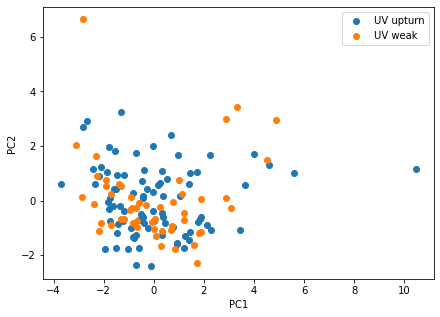

In [13]:
plt.subplots(figsize=(7,5))
plt.plot(pca_uvup_df['PC1'], pca_uvup_df['PC2'], 'o', label='UV upturn')
plt.plot(pca_uvwk_df['PC1'], pca_uvwk_df['PC2'], 'o', label='UV weak')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(loc='best')

plt.show()

In [14]:
pca.explained_variance_

array([3.62996554, 2.31651853, 1.20745534, 0.9702538 , 0.68710761,
       0.22172178])

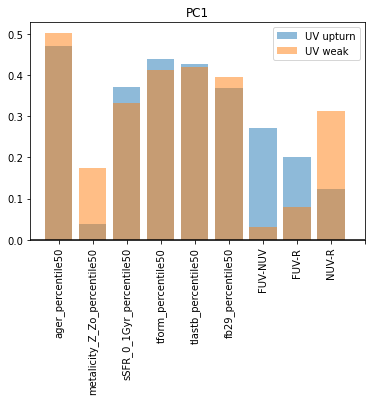

In [17]:
plt.title("PC1")
plt.bar(x=np.arange(0,9,1), height=np.abs(uvup_results.values[0,:]), label='UV upturn', alpha=0.5)
plt.bar(x=np.arange(0,9,1), height=np.abs(uvwk_results.values[0,:]), label='UV weak', alpha=0.5)
plt.axhline(y=0.0, c='black')
plt.legend(loc='best')
plt.xticks(np.arange(0,10,1), list(uvup_results.keys()), rotation=90)
plt.show()

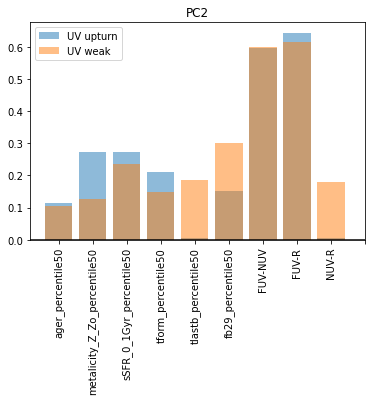

In [18]:
plt.title("PC2")
plt.bar(x=np.arange(0,9,1), height=np.abs(uvup_results.values[1,:]), label='UV upturn', alpha=0.5)
plt.bar(x=np.arange(0,9,1), height=np.abs(uvwk_results.values[1,:]), label='UV weak', alpha=0.5)
plt.axhline(y=0.0, c='black')
plt.legend(loc='best')
plt.xticks(np.arange(0,10,1), list(uvup_results.keys()), rotation=90)
plt.show()

In [19]:
list(uvup_results.keys())

['ager_percentile50',
 'metalicity_Z_Zo_percentile50',
 'sSFR_0_1Gyr_percentile50',
 'tform_percentile50',
 'tlastb_percentile50',
 'fb29_percentile50',
 'FUV-NUV',
 'FUV-R',
 'NUV-R']

In [20]:
xticks = [
#     r"$\log M_{\star}$", 
          r"$\left< \logt \right>_{r}$", 
          r"$\left< Z/Z_{\odot} \right>$", 
          r"$\left< \rm{sSFR} \right>$", 
          r"$\left< t_{\rm{form}} \right>$", 
          r"$\left< t_{\rm{last}} \right>$", 
          r"$\left< f_{\rm{burst}}^{2.9\rm{Gyr}} \right>$", 
          r"FUV-NUV", r"FUV-$r$", r"NUV-$r$"]

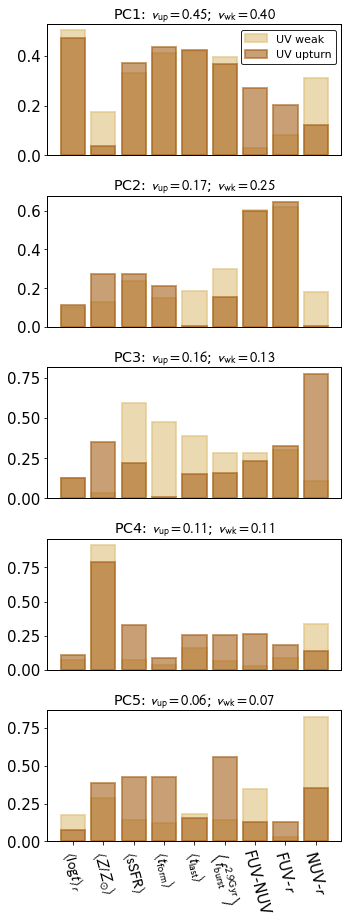

In [52]:
plt.rcParams.update(plotpars_3cols)
plt.subplots(figsize=(5,13))

p1 = plt.subplot(5, 1, 1)
plt.title(r"PC1: $v_{\rm{up}}=%.2f$; $v_{\rm{wk}}=%.2f$" % (uvup_var[0], uvwk_var[0]))
plt.bar(x=np.arange(0,9,1), height=np.abs(uvwk_results.values[0,:]), label='UV weak', alpha=0.6, 
        color=palette[1], edgecolor=palette[1], linewidth=2.)
plt.bar(x=np.arange(0,9,1), height=np.abs(uvup_results.values[0,:]), label='UV upturn', alpha=0.6, 
        color=palette[0], edgecolor=palette[0], linewidth=2.)
p1.xaxis.set_visible(False)
plt.legend(loc='best')
# plt.legend(loc='best')

p2 = plt.subplot(5, 1, 2)
plt.title(r"PC2: $v_{\rm{up}}=%.2f$; $v_{\rm{wk}}=%.2f$" % (uvup_var[1], uvwk_var[1]))
plt.bar(x=np.arange(0,9,1), height=np.abs(uvwk_results.values[1,:]), label='UV weak', alpha=0.6, 
        color=palette[1], edgecolor=palette[1], linewidth=2.)
plt.bar(x=np.arange(0,9,1), height=np.abs(uvup_results.values[1,:]), label='UV upturn', alpha=0.6, 
        color=palette[0], edgecolor=palette[0], linewidth=2.)
p2.xaxis.set_visible(False)

p3 = plt.subplot(5, 1, 3)
plt.title(r"PC3: $v_{\rm{up}}=%.2f$; $v_{\rm{wk}}=%.2f$" % (uvup_var[2], uvwk_var[2]))
plt.bar(x=np.arange(0,9,1), height=np.abs(uvwk_results.values[2,:]), label='UV weak', alpha=0.6, 
        color=palette[1], edgecolor=palette[1], linewidth=2.)
plt.bar(x=np.arange(0,9,1), height=np.abs(uvup_results.values[2,:]), label='UV upturn', alpha=0.6, 
        color=palette[0], edgecolor=palette[0], linewidth=2.)
p3.xaxis.set_visible(False)
# plt.legend(loc='best')

p4 = plt.subplot(5, 1, 4)
plt.title(r"PC4: $v_{\rm{up}}=%.2f$; $v_{\rm{wk}}=%.2f$" % (uvup_var[3], uvwk_var[3]))
plt.bar(x=np.arange(0,9,1), height=np.abs(uvwk_results.values[3,:]), label='UV weak', alpha=0.6, 
        color=palette[1], edgecolor=palette[1], linewidth=2.)
plt.bar(x=np.arange(0,9,1), height=np.abs(uvup_results.values[3,:]), label='UV upturn', alpha=0.6, 
        color=palette[0], edgecolor=palette[0], linewidth=2.)
p4.xaxis.set_visible(False)
# plt.legend(loc='best')
# plt.xticks(np.arange(0,9,1), xticks, rotation=-75)

plt.subplot(5, 1, 5)
plt.title(r"PC5: $v_{\rm{up}}=%.2f$; $v_{\rm{wk}}=%.2f$" % (uvup_var[4], uvwk_var[4]))
plt.bar(x=np.arange(0,9,1), height=np.abs(uvwk_results.values[4,:]), label='UV weak', alpha=0.6, 
        color=palette[1], edgecolor=palette[1], linewidth=2.)
plt.bar(x=np.arange(0,9,1), height=np.abs(uvup_results.values[4,:]), label='UV upturn', alpha=0.6, 
        color=palette[0], edgecolor=palette[0], linewidth=2.)
# plt.legend(loc='best')
plt.xticks(np.arange(0,9,1), xticks, rotation=-75)

plt.tight_layout()
plt.savefig(os.path.join(psm_path, 'pca_results.pdf'))
plt.savefig(os.path.join(psm_path, 'pca_results.png'))
plt.show()

## Testing kernel PCA

In [ ]:
knc = 6

In [ ]:
# kpca = skdecomp.KernelPCA??

In [ ]:
kpca = skdecomp.KernelPCA(n_components=knc, kernel='rbf', gamma=10)

In [ ]:
kpca_uvup = kpca.fit_transform(uv_upturn_std)
# print(kpca.)
# print(np.sum(pca.explained_variance_ratio_))
# uvup_results = pd.DataFrame(kpca., columns=uv_upturn.columns, 
#                                index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

In [ ]:
kpca_uvwk = kpca.fit_transform(uv_weak_std)

In [ ]:
kpca_uvup.shape

In [ ]:
plt.plot(kpca_uvup[:,2], kpca_uvup[:,5], 'o')
plt.plot(kpca_uvwk[:,2], kpca_uvwk[:,5], 'o')
plt.show()